========Logistic Regression========
Score is: 0.8109339407744874

========Naive Bayes Classifier========
Score is: 0.8405466970387244

========Decision Tree Classifier========
Score is: 0.7425968109339408

========Random Forest Classifier========
Score is: 0.8314350797266514

========XGB Classifier========
Score is: 0.8223234624145785



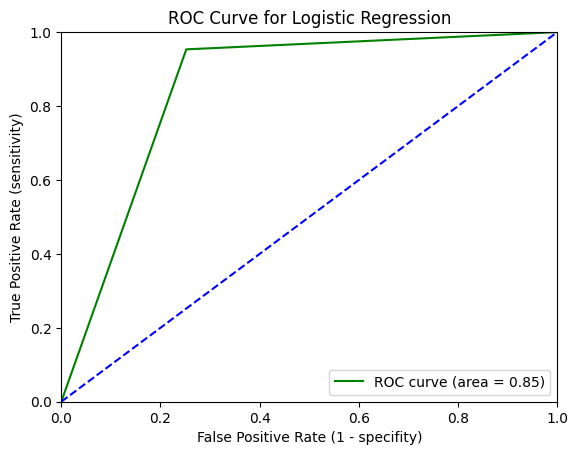

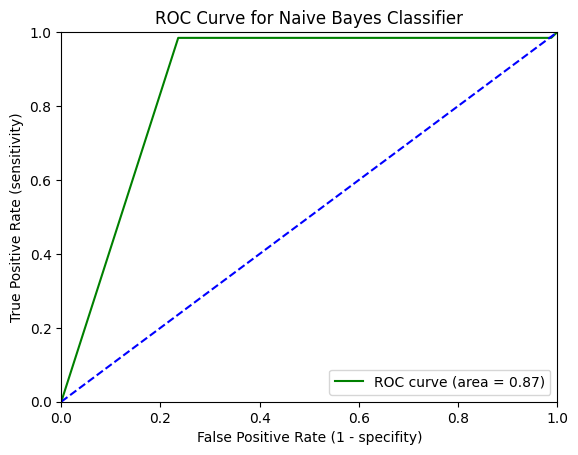

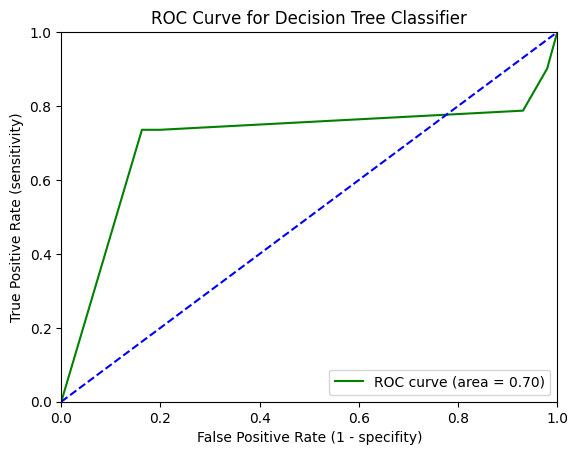

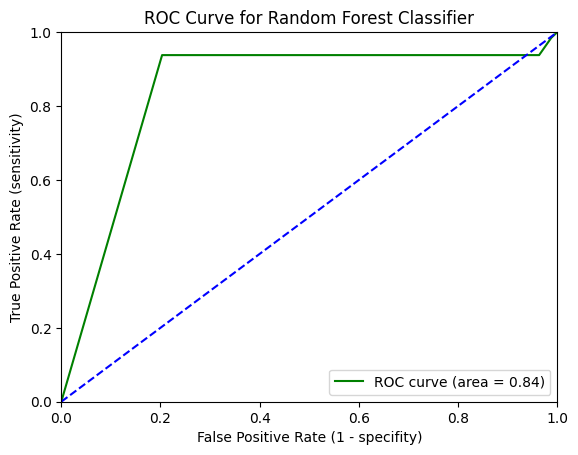

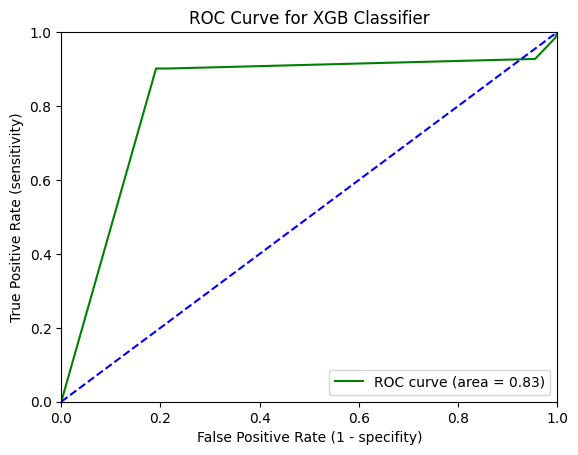

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
from xgboost.sklearn import XGBClassifier

data = pd.read_csv('seattle-weather.csv')
data = data.drop('date',axis=1)

le = LabelEncoder()
x = data.drop('weather',axis=1)
y = data['weather']
y = le.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

model_dict = {}

model_dict['Logistic Regression'] = LogisticRegression(solver='liblinear', random_state=42)
model_dict['Naive Bayes Classifier'] = GaussianNB()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=42)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=42)
model_dict['XGB Classifier'] = XGBClassifier(random_state=42)

def model_test(x_train,y_train,x_test,y_test,model,model_name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("========{}========".format(model_name))
    print("Score is: {}".format(accuracy))
    print()

for model_name, model in model_dict.items():
    model_test(x_train,y_train,x_test,y_test,model,model_name)

def Rocplot(x_train,y_train,x_test,y_test,model,model_name):
  model.fit(x_train,y_train)
  pred_res = model.predict(x_test)
  fpr_res,tpr_res,thresholds_res = roc_curve(y_test,pred_res,pos_label=4)
  roc_auc_res = metrics.auc(fpr_res, tpr_res)
  plt.plot(fpr_res, tpr_res,color='green', label='ROC curve (area = %0.2f)' % roc_auc_res)
  plt.plot([0,1],[0,1],color='blue',linestyle='--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.0])
  plt.title('ROC Curve for '+model_name)
  plt.xlabel('False Positive Rate (1 - specifity)')
  plt.ylabel('True Positive Rate (sensitivity)')
  plt.legend(loc="lower right")
  plt.show()
  roc_curve(y_test,pred_res,pos_label=4)

for model_name, model in model_dict.items():
  Rocplot(x_train,y_train,x_test,y_test,model,model_name)